In [52]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.pipeline import Pipeline

In [53]:
import seaborn as sns

In [54]:
df=pd.read_csv('data.csv',na_values='!')

In [55]:
df.head()

,x1,x2,x3,x4,x5,y
0,26.828514,11.376309,12.139863,-90.020767,40.604530,77.279236
1,26.490669,11.360129,12.132918,-89.874130,40.547834,77.235954
2,26.780882,11.365774,12.136567,-90.116440,40.574829,77.128441
3,26.815395,11.374666,12.137346,-90.145035,40.620548,77.333885
4,26.811258,11.361496,12.127857,-90.359573,40.687616,77.088814


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,188264.0,27.609896,3.836426,10.000000,25.899919,27.149996,28.652311,59.978474
x2,188340.0,13.216638,1.459283,10.000000,11.729387,13.510050,14.397304,17.208943
x3,188340.0,13.457851,1.428407,10.000000,11.979508,14.016594,14.571356,17.380466
x4,188340.0,-97.171700,15.926493,-127.988815,-101.600740,-96.874561,-93.289661,82.718788
x5,188340.0,49.290472,12.243858,10.048418,41.040485,52.688627,57.063125,119.908676
y,188269.0,78.520806,7.834590,10.154835,77.195305,78.986374,80.356285,117.843216


In [57]:
df.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
y     float64
dtype: object

In [58]:
'''
convert_dict = {'x1':float, 
                'x2':float,
                'x3':float,
                'x4':float,
                'x5':float,
                'y': float
               } 
  
df = df.astype(convert_dict) 
'''

"\nconvert_dict = {'x1':float, \n                'x2':float,\n                'x3':float,\n                'x4':float,\n                'x5':float,\n                'y': float\n               } \n  \ndf = df.astype(convert_dict) \n"

In [59]:
# Summarize our dataset 
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())

Rows     :  188340
Columns  :  6

Features : 
 ['x1', 'x2', 'x3', 'x4', 'x5', 'y']


In [60]:
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())


Missing values :   147

Unique values :  
 x1    182521
x2    182829
x3    185792
x4    168196
x5    181672
y     171707
dtype: int64


In [61]:
df.isnull().sum()

x1    76
x2     0
x3     0
x4     0
x5     0
y     71
dtype: int64

In [62]:
df[df.y.isnull()]

,x1,x2,x3,x4,x5,y
13445,NaN,12.135685,13.186743,-110.031120,52.596416,NaN
13446,NaN,12.135685,13.186743,-110.031120,52.596416,NaN
13447,NaN,12.135685,13.186743,-110.031120,52.596416,NaN
47334,25.835984,10.598620,11.696663,-95.542107,36.672272,NaN
47680,NaN,10.253609,11.593371,-94.479156,34.262167,NaN
...,...,...,...,...,...,...
154758,NaN,14.898221,15.042268,-111.962524,66.063461,NaN
154759,NaN,14.898221,15.042268,-111.962524,66.063461,NaN
154760,NaN,14.898221,15.042268,-111.962524,66.063461,NaN
154761,NaN,14.898221,15.042268,-111.962524,66.063461,NaN


In [63]:
df[df.y.notnull()]

,x1,x2,x3,x4,x5,y
0,26.828514,11.376309,12.139863,-90.020767,40.604530,77.279236
1,26.490669,11.360129,12.132918,-89.874130,40.547834,77.235954
2,26.780882,11.365774,12.136567,-90.116440,40.574829,77.128441
3,26.815395,11.374666,12.137346,-90.145035,40.620548,77.333885
4,26.811258,11.361496,12.127857,-90.359573,40.687616,77.088814
...,...,...,...,...,...,...
188335,28.008291,14.774708,14.902246,-103.637146,60.235382,80.234718
188336,27.908979,14.783770,14.921154,-103.587166,60.322388,80.418961
188337,28.000303,14.781551,14.913784,-103.801300,60.278751,80.498459
188338,28.177183,14.814153,14.942048,-103.715134,60.430935,80.614349


In [64]:
df=df[df.y.notnull()]
print(df.shape)

(188269, 6)


In [65]:
df[df.x1.isnull()]

,x1,x2,x3,x4,x5,y
6023,NaN,13.396100,13.524277,-117.363152,60.867046,85.925476
13428,NaN,12.111576,13.231605,-108.813690,53.596710,83.179962
13429,NaN,12.111576,13.231605,-108.813690,53.596710,83.378876
13430,NaN,12.111576,13.231605,-108.813690,53.596710,83.577789
13431,NaN,12.111576,13.231605,-108.813690,53.596710,83.776703
142061,NaN,10.247014,10.010654,76.555664,10.089306,10.208038


In [66]:
mean_ofcolumn=df['x1'].mean()
print(mean_ofcolumn)
df['x1'] = df['x1'].fillna((df['x1'].mean()))

27.60990501115355


In [69]:
df.iloc[6023][:]

x1     27.609905
x2     13.396100
x3     13.524277
x4   -117.363152
x5     60.867046
y      85.925476
Name: 6023, dtype: float64

In [67]:
df

,x1,x2,x3,x4,x5,y
0,26.828514,11.376309,12.139863,-90.020767,40.604530,77.279236
1,26.490669,11.360129,12.132918,-89.874130,40.547834,77.235954
2,26.780882,11.365774,12.136567,-90.116440,40.574829,77.128441
3,26.815395,11.374666,12.137346,-90.145035,40.620548,77.333885
4,26.811258,11.361496,12.127857,-90.359573,40.687616,77.088814
...,...,...,...,...,...,...
188335,28.008291,14.774708,14.902246,-103.637146,60.235382,80.234718
188336,27.908979,14.783770,14.921154,-103.587166,60.322388,80.418961
188337,28.000303,14.781551,14.913784,-103.801300,60.278751,80.498459
188338,28.177183,14.814153,14.942048,-103.715134,60.430935,80.614349


In [70]:
correlation=df.corr()

<AxesSubplot:>

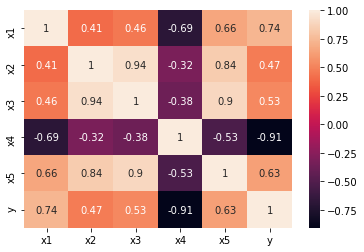

In [71]:
sns.heatmap(correlation,annot=True)

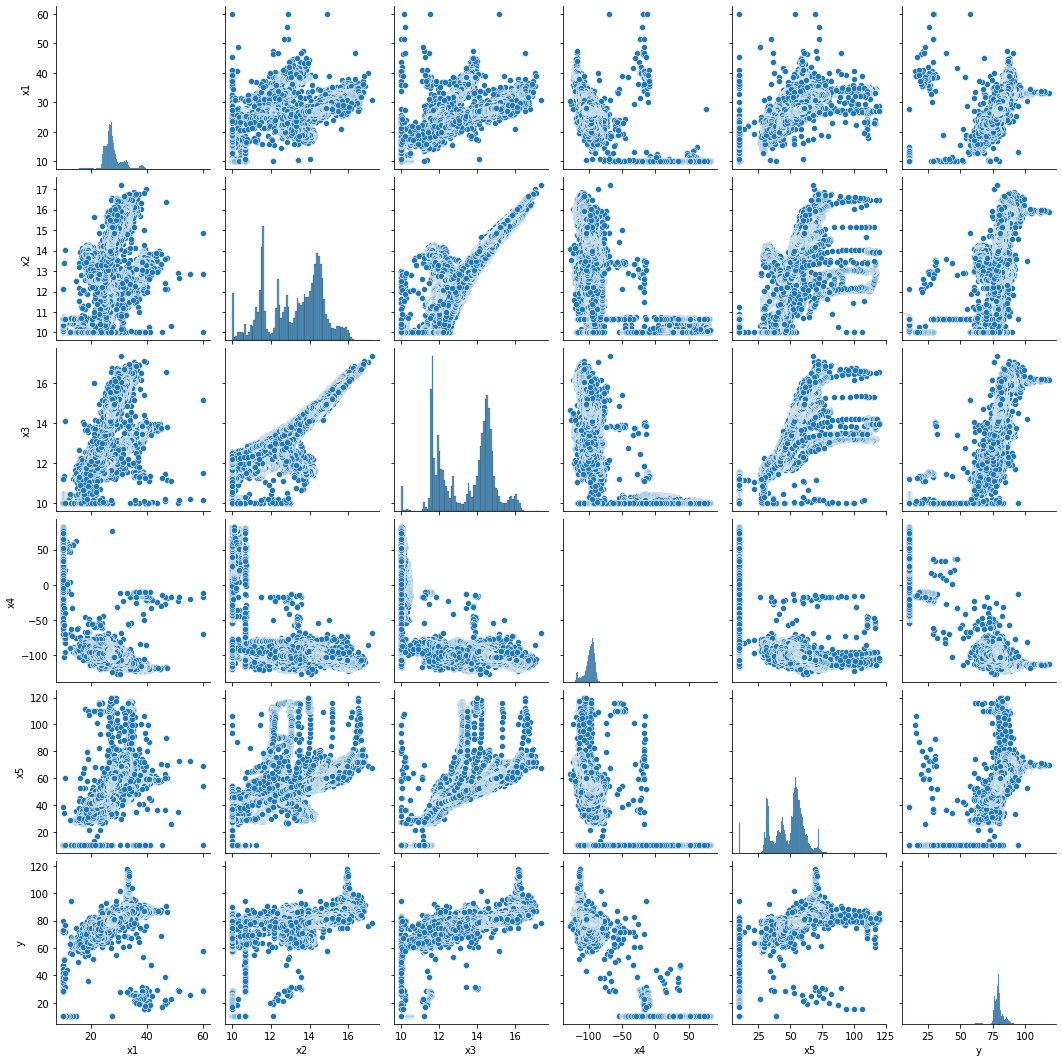

In [72]:
sns.pairplot(df)

# Column x4 has Outliers

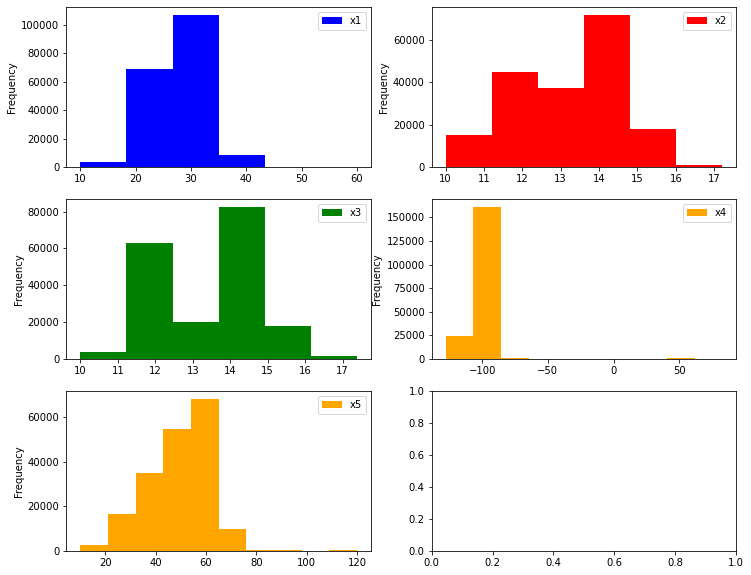

In [77]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="x1", bins=6, color="b", ax=axes[0][0])
df.plot(kind="hist", y="x2", bins=6, color="r", ax=axes[0][1])
df.plot(kind="hist", y="x3", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="x4", bins=10, color="orange", ax=axes[1][1])
df.plot(kind="hist", y="x5", bins=10, color="orange", ax=axes[2][0])
plt.show()

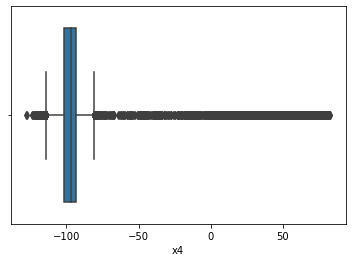

In [78]:
sns.boxplot(x='x4',data = df)
plt.show()

In [89]:
df=df[df['x4']<40]

In [90]:
df.shape

(187172, 6)

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [87]:
def r2metrics(model,X,y):
    mse=mean_squared_error(y,model.predict(X))
    mae=mean_absolute_error(y,model.predict(X))
    rmse=np.sqrt(mean_squared_error(y,model.predict(X)))
    print('mse :{}'.format(mse))
    print('mae :{}'.format(mae))
    print('rmse :{}'.format(rmse))
def plotgraph(model,X_train,y_train,X_test,y_test):
    import seaborn as sns
    sns.set(color_codes=True)
    plt.figure(figsize=(10,9))
    sns.regplot(x=y_test, y=model.predict(X_test),fit_reg=True,scatter_kws={"color": "green"});
    sns.regplot(x=y_train, y=model.predict(X_train),fit_reg=True,scatter_kws={"color": "yellow"});
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title('Train data vs Test Data ')
    plt.show()
def rmse_m(model,X,y):
    rmse=np.sqrt(mean_squared_error(y,model.predict(X)))
    print('rmse :{}'.format(rmse))
    return rmse

In [111]:
df.iloc[:,:-1].values

array([[  26.8285141 ,   11.37630916,   12.13986349,  -90.0207672 ,
          40.60453033],
       [  26.4906693 ,   11.36012852,   12.13291788,  -89.87413025,
          40.5478344 ],
       [  26.7808819 ,   11.36577427,   12.13656688,  -90.1164398 ,
          40.5748291 ],
       ...,
       [  28.0003033 ,   14.78155136,   14.91378355, -103.8013    ,
          60.27875137],
       [  28.1771832 ,   14.81415319,   14.9420476 , -103.7151337 ,
          60.43093491],
       [  28.1800404 ,   14.84992886,   14.98011637, -103.577713  ,
          60.49596786]])

In [127]:
pipeline_lasso=Pipeline([('scalar1',StandardScaler()),('lasso',Lasso())])
pipeline_ridge=Pipeline([('scalar2',StandardScaler()),('ridge',Ridge())])
pipeline_lr=Pipeline([('scalar3',StandardScaler()),('lr_regressor',LinearRegression())])
pipeline_rfr=Pipeline([('scalar4',StandardScaler()),('RandomForestRegressor',RandomForestRegressor())])
pipeline_svr=Pipeline([('scalar5',StandardScaler()),('SVR',SVR())])
pipeline_dtr=Pipeline([('scalar6',StandardScaler()),('DecisionTreeRegressor',DecisionTreeRegressor())])
pipeline_xgbr=Pipeline([('scalar7',StandardScaler()),('XGBRegressor',XGBRegressor())])
pipelines = [pipeline_lasso, pipeline_ridge, pipeline_lr,pipeline_rfr,pipeline_svr,pipeline_dtr,pipeline_xgbr]

In [128]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1].values,df['y'],test_size=0.20)

In [129]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Lasso Regression', 1: 'Ridge Regression', 2: 'Linear Regression',3:'Randomforest',4:'Support Vector',5:'Decision Tree',6:'XGBoost'}

# Fit the pipelines
for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar1', StandardScaler()), ('lasso', Lasso())])
Pipeline(steps=[('scalar2', StandardScaler()), ('ridge', Ridge())])
Pipeline(steps=[('scalar3', StandardScaler()),
                ('lr_regressor', LinearRegression())])
Pipeline(steps=[('scalar4', StandardScaler()),
                ('RandomForestRegressor', RandomForestRegressor())])
Pipeline(steps=[('scalar5', StandardScaler()), ('SVR', SVR())])
Pipeline(steps=[('scalar6', StandardScaler()),
                ('DecisionTreeRegressor', DecisionTreeRegressor())])
Pipeline(steps=[('scalar7', StandardScaler()),
                ('XGBRegressor',
                 XGBRegressor(base_score=None, booster=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, gamma=None, gpu_id=None,
                              importance_type='gain',
                              interaction_constraints=None, learning_rate=None,
                              max_de

In [130]:

for i,model in enumerate(pipelines):
    print("{} ".format(pipe_dict[i]))
    r2metrics(model,X_test,y_test)

Lasso Regression 
mse :8.631100032059203
mae :1.449865641092596
rmse :2.937873385981636
Ridge Regression 
mse :7.051432700738919
mae :1.6470527777752912
rmse :2.6554533889222984
Linear Regression 
mse :7.051439807485451
mae :1.64706230013304
rmse :2.6554547270637943
Randomforest 
mse :0.6626940284220522
mae :0.4079155216224845
rmse :0.8140602117915187
Support Vector 
mse :1.5789767359709965
mae :0.6261481902493609
rmse :1.2565734104981676
Decision Tree 
mse :1.30162738170229
mae :0.5529270331521304
rmse :1.140888855981287
XGBoost 
mse :0.8331082422691816
mae :0.5165765662726457
rmse :0.9127476333955523


In [131]:
for i,model in enumerate(pipelines):
    print("{} ".format(pipe_dict[i]))
    cv_scores = cross_val_score(model,X_test,y_test,cv=10, scoring='neg_mean_squared_error')
    print(" cvscore : {} ".format(np.mean(np.sqrt(-cv_scores))))

Lasso Regression 
 cvscore : 2.9611624703942114 
Ridge Regression 
 cvscore : 2.648956165053295 
Linear Regression 
 cvscore : 2.648958121429395 
Randomforest 
 cvscore : 0.965532134078148 
Support Vector 
 cvscore : 1.7131864982417828 
Decision Tree 
 cvscore : 1.3131710777881687 
XGBoost 
 cvscore : 1.0866399629858823 


Lasso Regression 


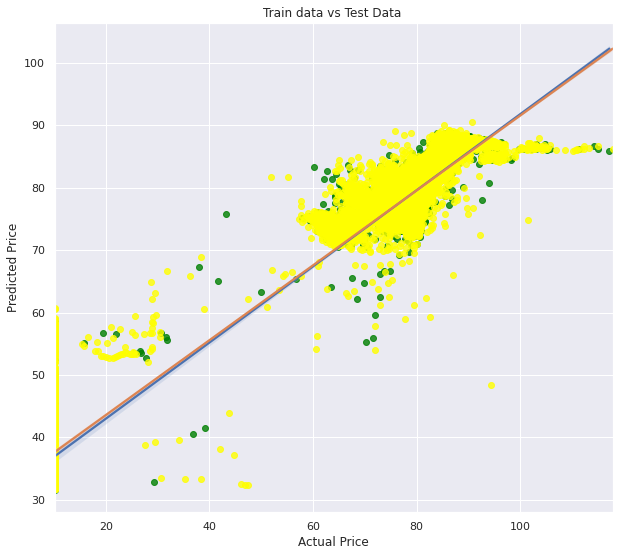

Ridge Regression 


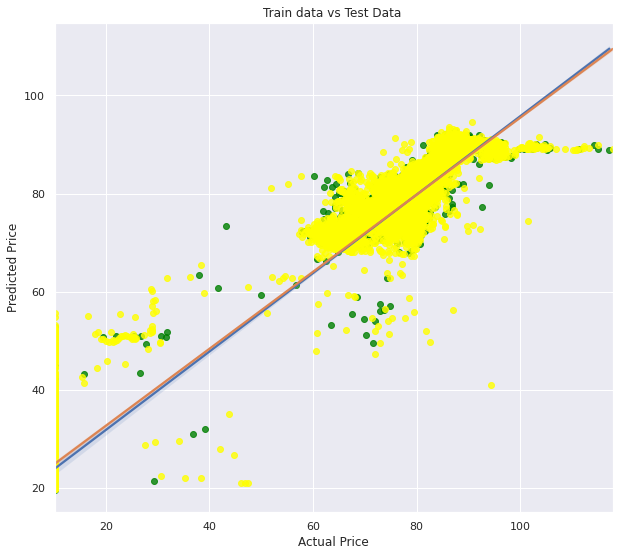

Linear Regression 


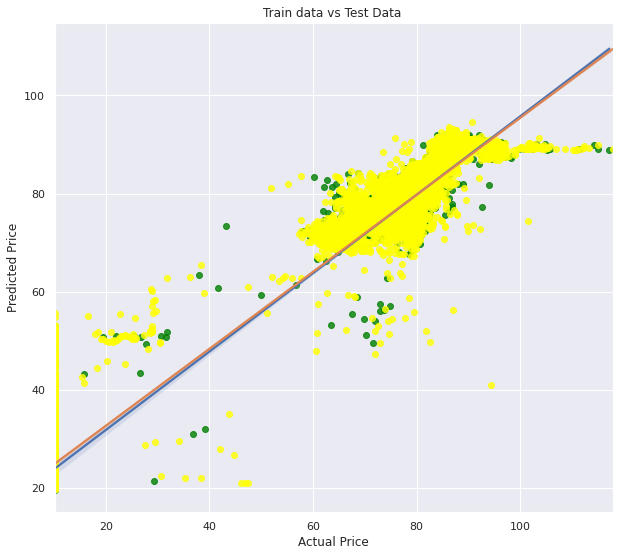

Randomforest 


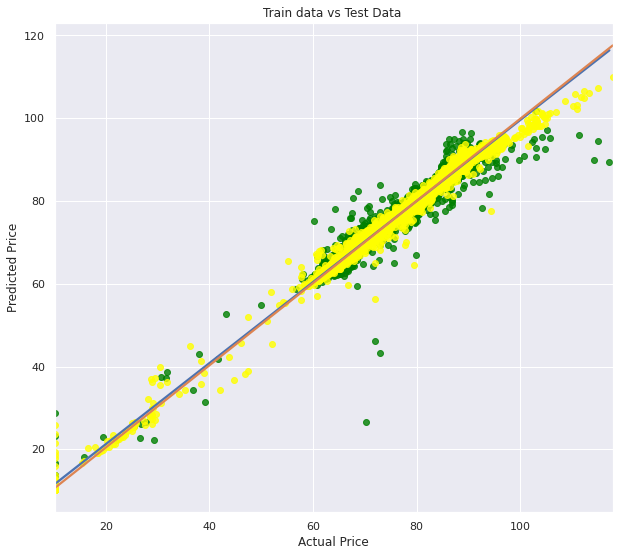

Support Vector 


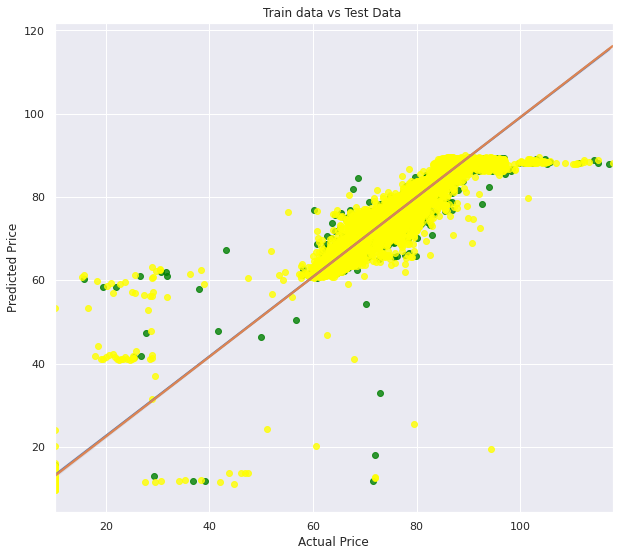

Decision Tree 


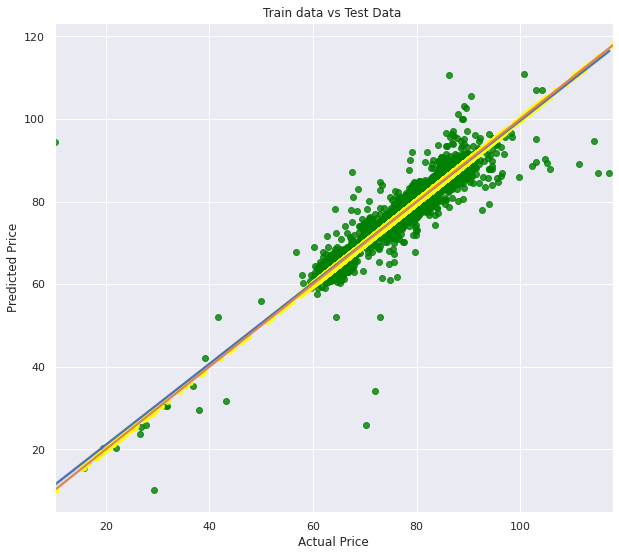

XGBoost 


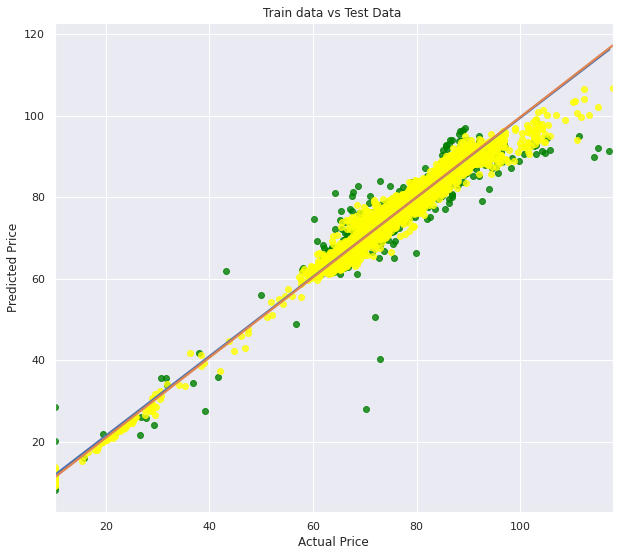

In [132]:
for i,model in enumerate(pipelines):
    print("{} ".format(pipe_dict[i]))
    plotgraph(model,X_train, y_train,X_test,y_test)

# Checking importance of a column

In [133]:
l=df.iloc[:][:-1].columns
l=l[ :-1]
l

Index(['x1', 'x2', 'x3', 'x4', 'x5'], dtype='object')

In [134]:
importance=pd.DataFrame(pipeline_lasso['lasso'].coef_,l)
importance.reset_index(inplace=True)
importance.columns={'atrribute','coefficient'}
importance

,atrribute,coefficient
0,x1,0.750035
1,x2,0.005714
2,x3,0.747640
3,x4,-3.095098
4,x5,0.000000


In [135]:
importance=pd.DataFrame(pipeline_ridge['ridge'].coef_,l)
importance.reset_index(inplace=True)
importance.columns={'atrribute','coefficient'}
importance

,atrribute,coefficient
0,x1,1.424885
1,x2,0.778843
2,x3,1.651947
3,x4,-3.757303
4,x5,-1.297017


<AxesSubplot:>

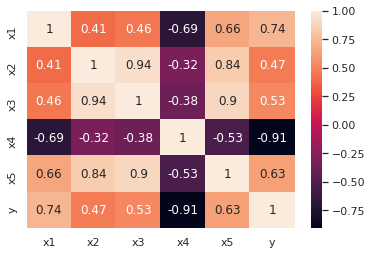

In [136]:
sns.heatmap(correlation,annot=True)

In [137]:
feature_importances = pd.DataFrame(pipeline_rfr['RandomForestRegressor'].feature_importances_,
                                   index =l,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
x4,0.683233
x1,0.150015
x5,0.106298
x3,0.050361
x2,0.010093


It is clear from the above results that x2 column does not have much impact on determining y

In [ ]:
from sklearn.model_selection import GridSearchCV


parameters =    {
            "n_estimators"      : [100,200],
            "bootstrap": [True, False],
            }

#pipeline_rfr=Pipeline([('scalar4',StandardScaler()),('RandomForestRegressor',RandomForestRegressor())])
clf = Pipeline([('scalarGVRFR',StandardScaler()), 
                    ('RandomForestRegressorGV',GridSearchCV(RandomForestRegressor(),
                                 scoring = 'neg_mean_squared_error',
                                 n_jobs = -1,
                                 param_grid=parameters,
                                 cv=10))])


clf.fit(X_train, y_train)



In [ ]:
model = clf['RandomForestRegressorGV'].best_estimator_

In [ ]:
best_score = clf['RandomForestRegressorGV'].best_score_
best_parameters = clf['RandomForestRegressorGV'].best_params_
print("Best Accuracy: {:.2f} %".format(best_score ))
print("Best Parameters:", best_parameters)